Feature Selection Using Decision Tree/Random Forest

We will now conduct feature selection using decision trees on the data where there is a three year gap between feature values and crime rate.

In [1]:
import pandas as pd
import time

In [2]:
Train_Data = pd.read_csv('//Users/alyzehjiwani/Downloads/Data/Final Data Used/Year_Gap_SMOTE_Train_data.csv')
Test_Data = pd.read_csv('/Users/alyzehjiwani/Downloads/Data/Final Data Used/Crime_Data_Year_Gap_Test.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
start = time.process_time()

In [5]:
Train_Data = Train_Data.drop('Unnamed: 0',axis = 1)
Test_Data = Test_Data.drop('Unnamed: 0', axis = 1)
X_train = Train_Data.loc[:,Train_Data.columns!='C_Rate']
X_test = Test_Data
y_train = Train_Data['C_Rate']


In [6]:
X_train.shape, X_test.shape, y_train.shape

((960, 12), (420, 12), (960,))

In [7]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf=5)


In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [9]:
import io
from io import StringIO
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.metrics import classification_report, accuracy_score
from pydot import graph_from_dot_data

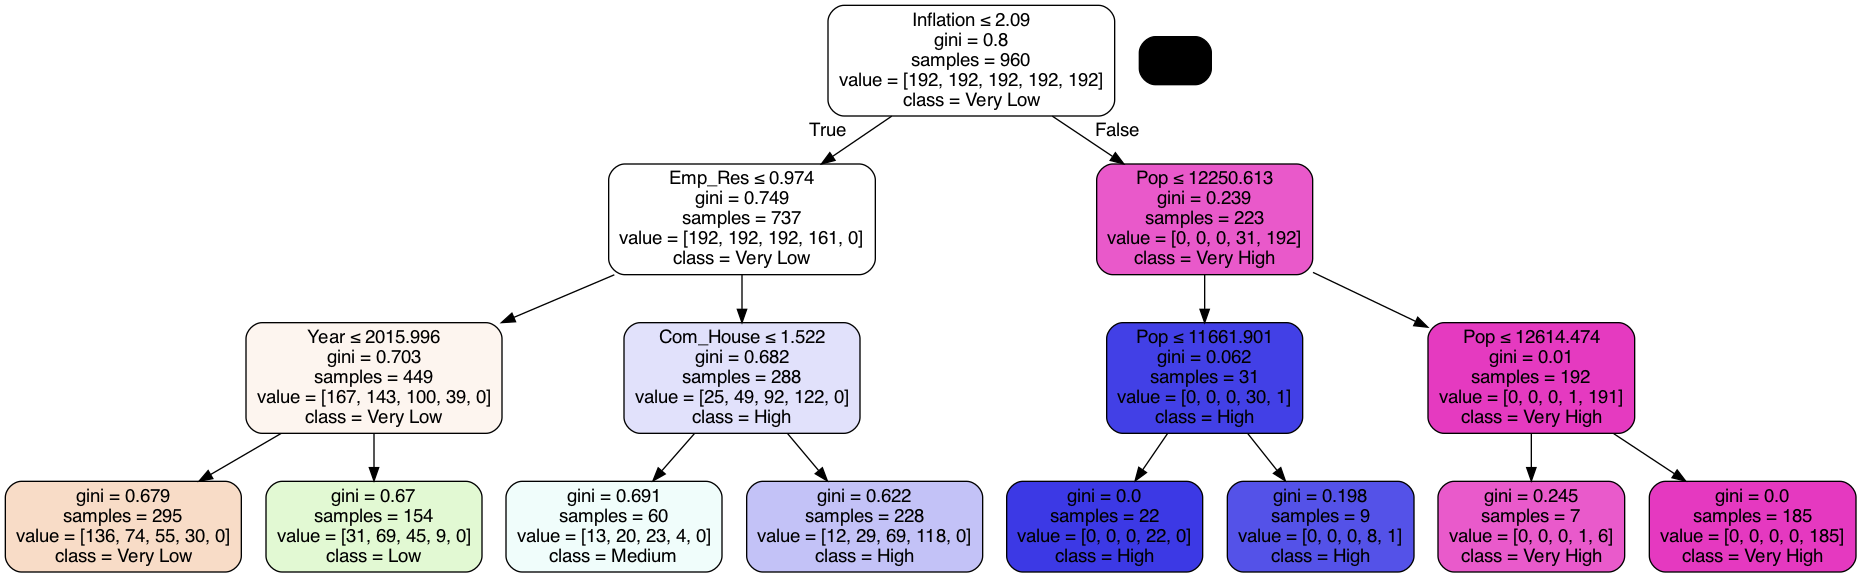

In [10]:
xvar = Train_Data.drop('C_Rate', axis = 1)
feature_cols = xvar.columns
dot_data = StringIO()
export_graphviz(model, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph,)= graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())




In [11]:
predictions = model.predict(X_test)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model.predict(X_train)))


Decision Tree Train Accuracy: 0.590625


In [12]:
#runtime for model
t1 = time.process_time() - start
print(t1)

0.3914620000000002


Again, our accuracy improved when using the data containing synthesised data.
We will now use permutation feature importance to further evaluate the importance of our features

In [13]:
from sklearn.inspection import permutation_importance

We will run it on our train set as we dont have response values for our test set

In [14]:
r_1 = permutation_importance(model, X_train, y_train, n_repeats = 30, random_state = 0)

In [15]:
for i in r_1.importances_mean.argsort()[::-1]:
    if r_1.importances_mean[i] - 2 * r_1.importances_std[i] > 0:
        print(f"{list(Train_Data.columns.values)[i]:<8}"
              f"{r_1.importances_mean[i]:.3f}"
              f" +/- {r_1.importances_std[i]:.3f}")

Inflation0.250 +/- 0.010
Emp_Res 0.119 +/- 0.009
Pop     0.067 +/- 0.006
Year    0.058 +/- 0.008
Com_House0.029 +/- 0.007


Lets see if dropping the "unneccessary" columns improves our model.

In [16]:
Train_Data.columns.values

array(['Year', 'N_ID', 'Pop', 'Ad_Ed', 'Child_Care', 'Com_House',
       'Emp_Res', 'Sub_Trt', 'Trans_House', 'Recreation', 'Inflation',
       'NIA', 'C_Rate'], dtype=object)

In [17]:
Test_Data.head()

,Year,N_ID,Pop,Ad_Ed,Child_Care,Com_House,Emp_Res,Sub_Trt,Trans_House,Recreation,Inflation,NIA
0,2019,97,13789.999686,0,0,0,0,0,0,0,1.95,0
1,2019,27,29846.996720,1,0,4,8,2,0,1,1.95,1
2,2019,38,17784.999438,3,0,0,3,0,0,0,1.95,0
3,2019,31,16971.000148,1,0,48,4,0,0,0,1.95,0
4,2019,16,27007.001187,0,46,0,1,0,0,1,1.95,0


In [18]:
new_train = X_train.drop(['N_ID','Ad_Ed', 'Child_Care','Sub_Trt', 'Trans_House', 'Recreation', 'NIA'], axis = 1)
new_test = Test_Data.drop(['N_ID',  'Ad_Ed', 'Child_Care', 'Sub_Trt', 'Trans_House', 'Recreation', 'NIA'], axis = 1)

In [19]:
new_train.shape, y_train.shape, new_test.shape

((960, 5), (960,), (420, 5))

In [20]:
model_2 = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf=5)


In [21]:
model_2.fit(new_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

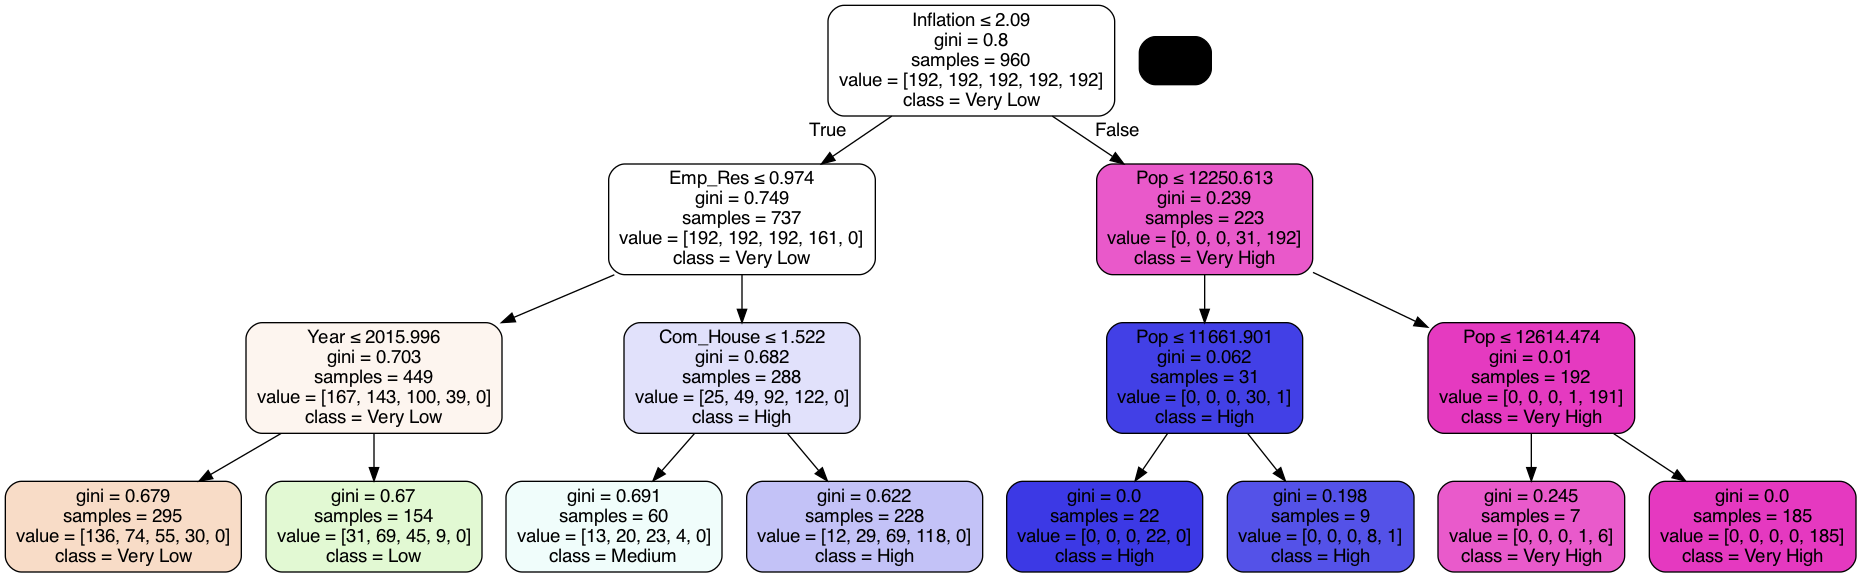

In [22]:
new_var = new_train
new_feature_cols = new_var.columns
new_dot_data = StringIO()
export_graphviz(model_2, out_file = new_dot_data, filled = True, rounded = True, special_characters = True, feature_names = new_feature_cols, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_1,)= graph_from_dot_data(new_dot_data.getvalue())
Image(graph_1.create_png())



In [23]:
predictions = model_2.predict(new_test)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_2.predict(new_train)))


Decision Tree Train Accuracy: 0.590625


In [24]:
#runtime for model
t2 = time.process_time() - t1
print(t2)

3.5278009999999997


Our accuracy for our model on our train set remained the same. Let's see if dropping Com_House changes anything.

In [25]:
train_2 = X_train.drop(['N_ID','Ad_Ed', 'Child_Care','Sub_Trt', 'Trans_House', 'Recreation', 'NIA','Com_House'], axis = 1)
test_2 = Test_Data.drop(['N_ID','Ad_Ed', 'Child_Care','Sub_Trt', 'Trans_House', 'Recreation', 'NIA','Com_House'], axis = 1)

In [26]:
model_3 = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 3, min_samples_leaf=5)


In [27]:
model_3.fit(train_2, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

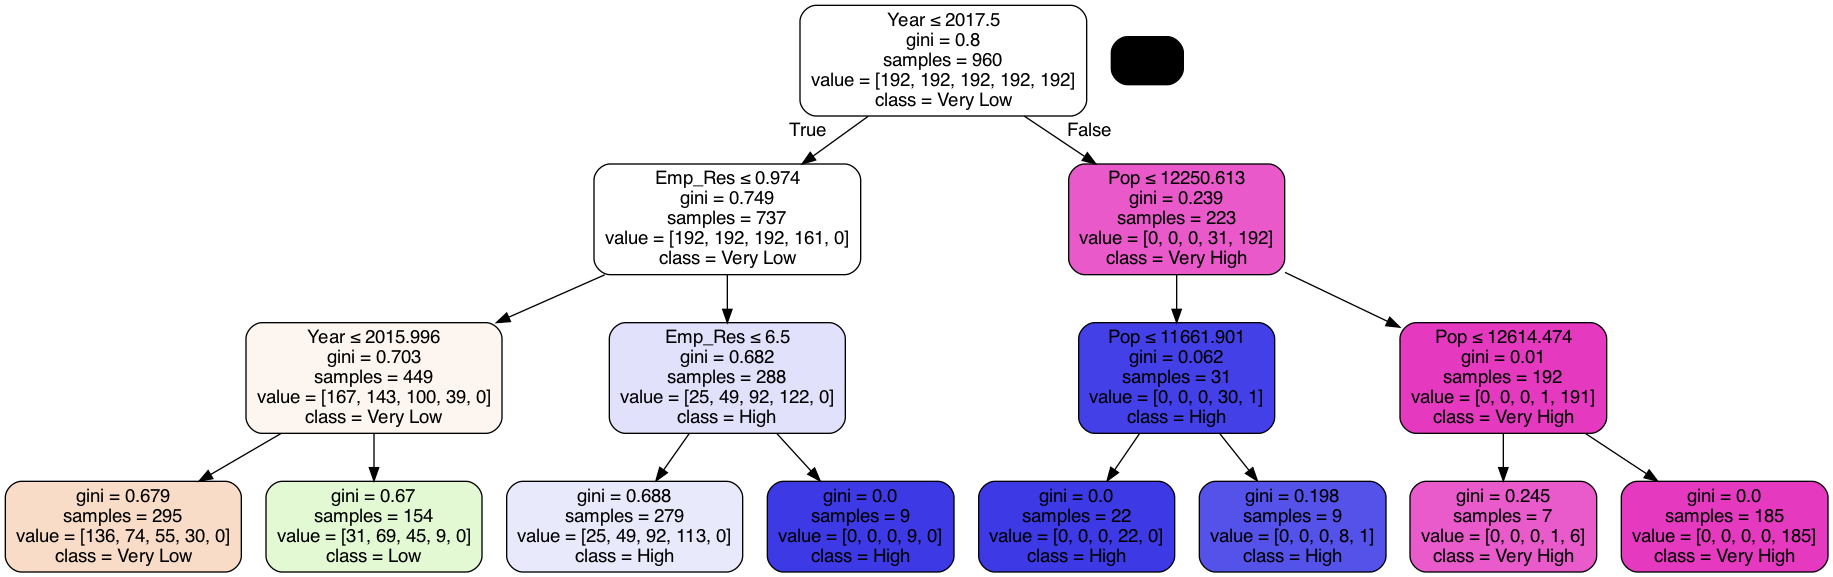

In [28]:
var_2 = train_2
feature_cols_2 = var_2.columns
dot_data_2 = StringIO()
export_graphviz(model_3, out_file = dot_data_2, filled = True, rounded = True, special_characters = True, feature_names = feature_cols_2, class_names = ['Very Low','Low','Medium','High','Very High'])
(graph_2,)= graph_from_dot_data(dot_data_2.getvalue())
Image(graph_2.create_png())



In [29]:
predictions = model_3.predict(test_2)
print ("Decision Tree Train Accuracy:", accuracy_score(y_train, model_3.predict(train_2)))


Decision Tree Train Accuracy: 0.5708333333333333


In [30]:
#runtime for model
t3 = time.process_time() - t2
print(t3)

0.554052


Our Accuracy reduced, so we will keep the features Inflation, Year, Emp_Res, Pop and Com_House. 